# **Projeto Interdisciplinar: Wine Dataset**
## D1DAE: Análise Estatística para Ciência de Dados    
## IFSP Campinas

**Importando as bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_wine

## 📊 1. Análise Exploratória

O arquivo considerando neste notebook encontra-se aqui;

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

### 1.1. Importando o dataset e mostrando informações básicas

In [2]:
wine = load_wine(as_frame=True)

# Converter o objeto Bunch em um DataFrame do Pandas
df = wine.data
df_target = wine.target
df_completo = pd.concat([wine.data, wine.target], axis=1)

# Salvar o DataFrame como um arquivo CSV
df.to_csv('datasets/wine_dataset.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Vamos contar quantas linhas/amostras nulas existem**

In [3]:
# Contar os valores nulos em todo o DataFrame
total_valores_nulos = df.isnull().sum().sum()

# Exibir o resultado
print('Este dataset tem {:.0f} atributos/colunas e {:.0f} linhas/amostras das quais, {:.0f} são linhas/amostras nulas.\nLogo, temos uma inconsistência de {:.2f}%'.format(df.shape[1], df.shape[0], total_valores_nulos, (total_valores_nulos/df.shape[0])*100 ))

Este dataset tem 13 atributos/colunas e 178 linhas/amostras das quais, 0 são linhas/amostras nulas.
Logo, temos uma inconsistência de 0.00%


### 1.2.1 Transformando o dataset

In [4]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Como todas as colunas estão com tipos convênientes nos registros, não é necessário alterações no dataset**

**Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão baseado nos dados de teste**

In [5]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### 1.3 Correlações

<Axes: >

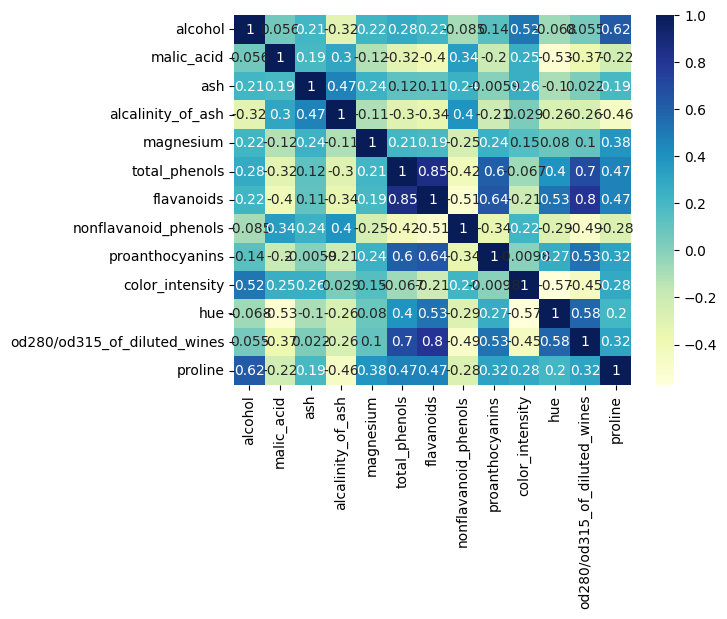

In [6]:
# Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [7]:
correlation_matrix = train_data.corr()

train_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

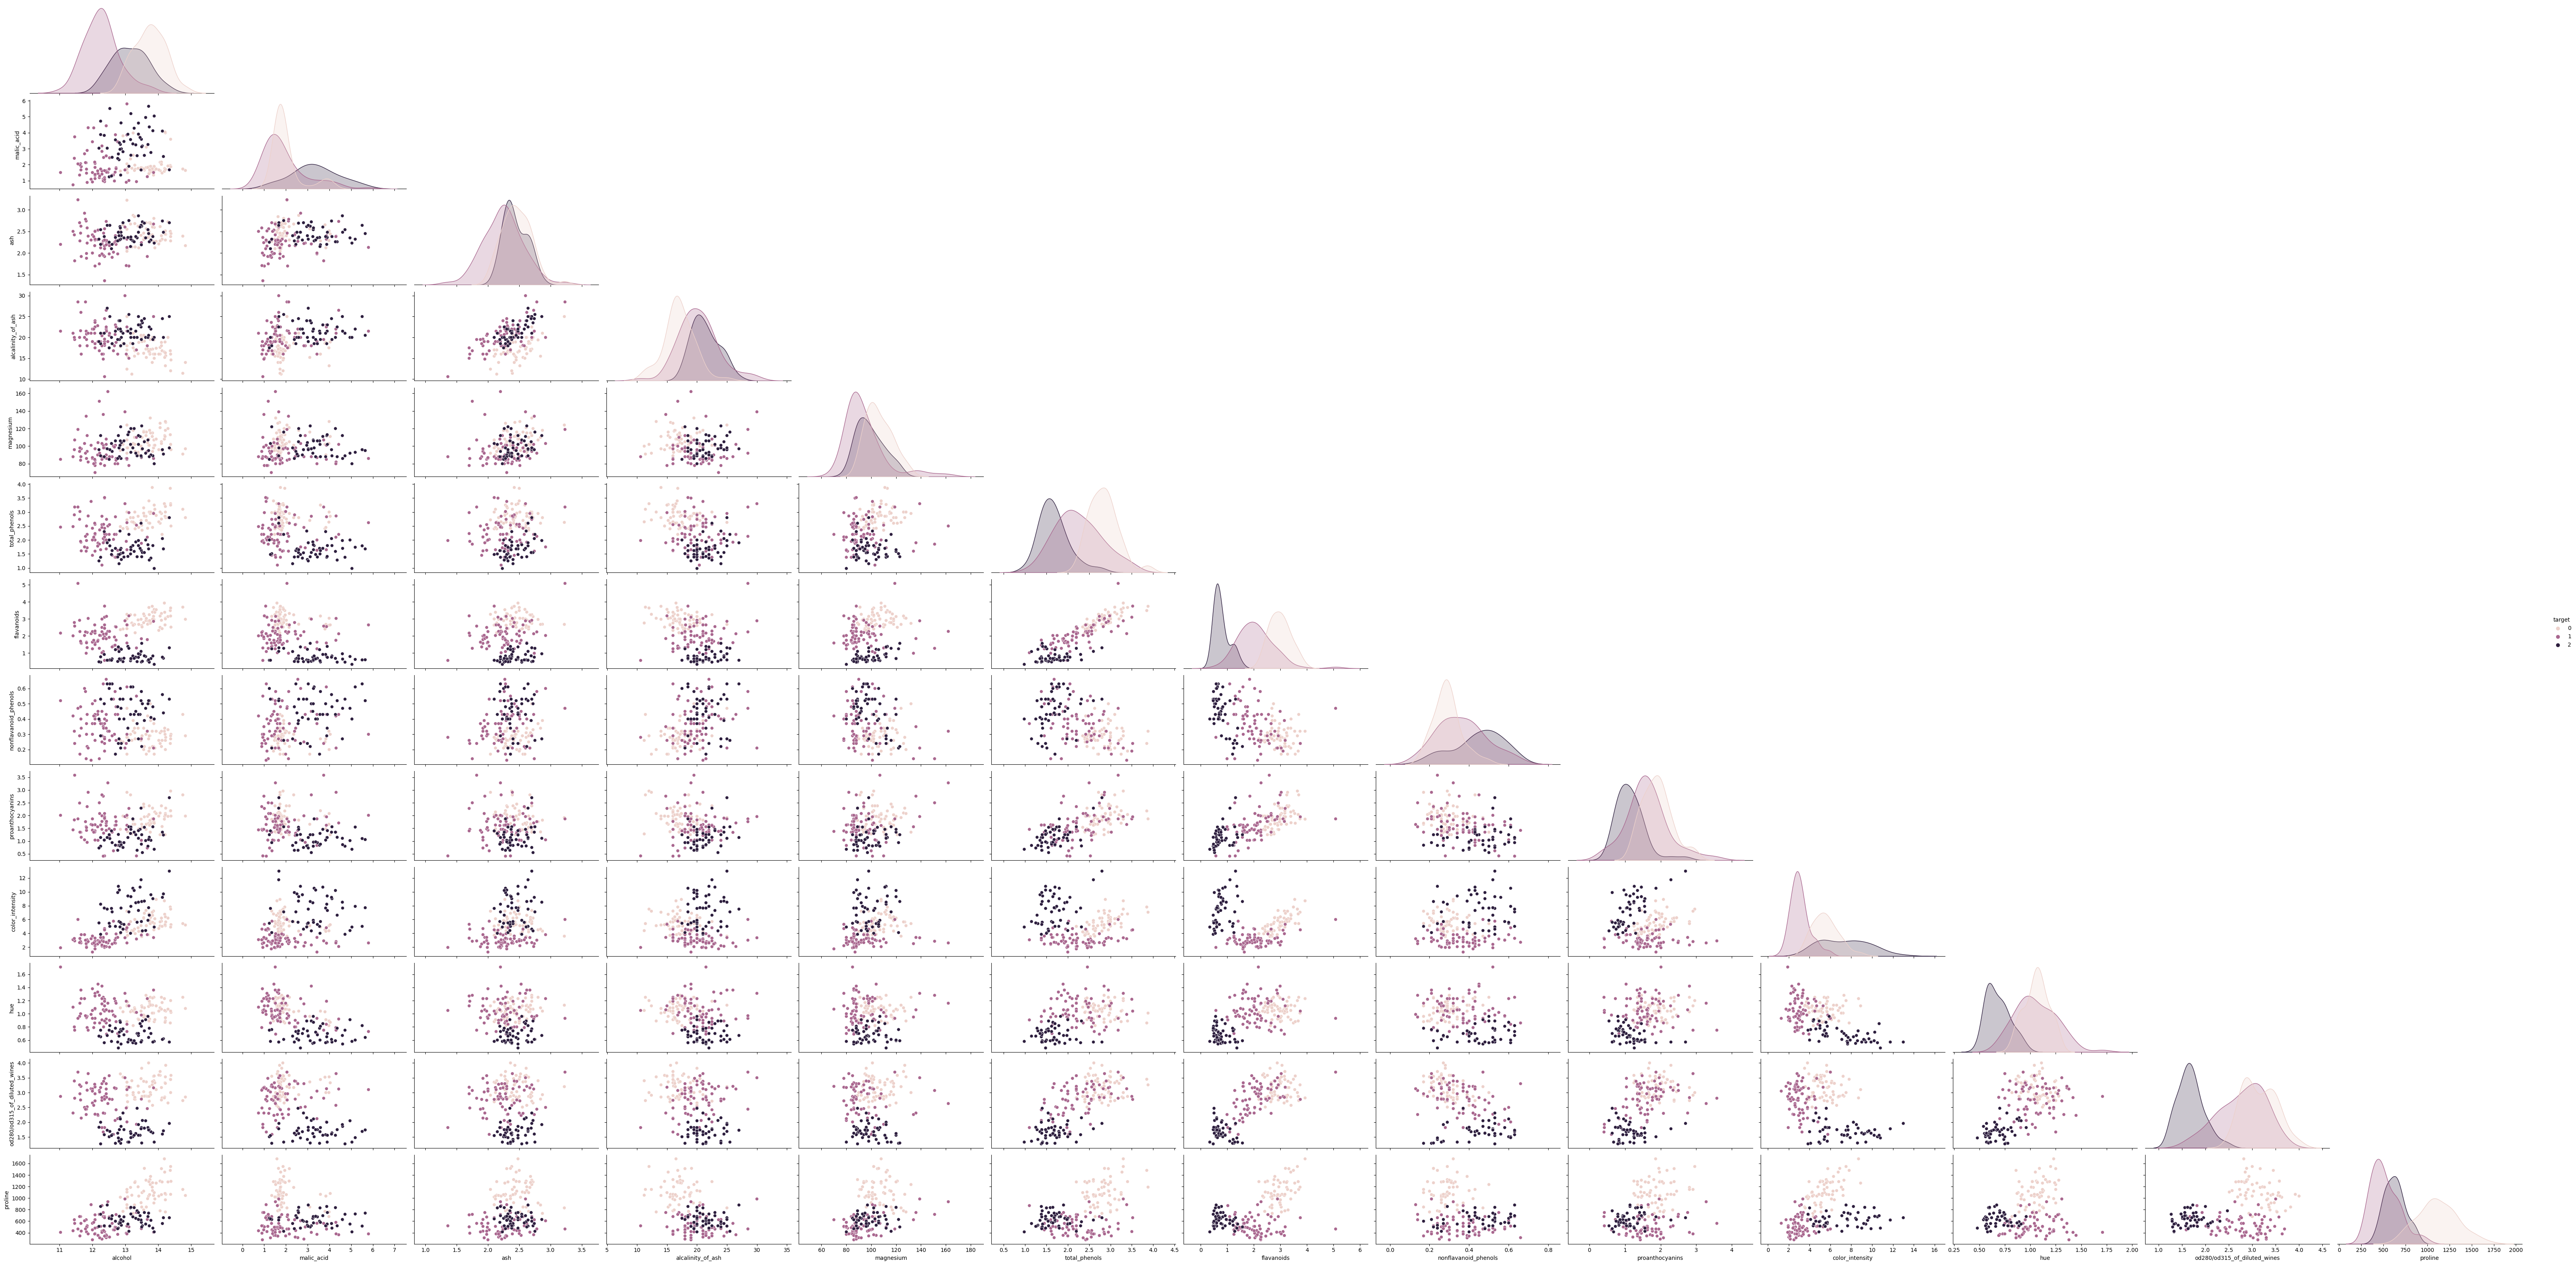

In [8]:
sns.pairplot(df_completo, aspect=2,hue="target",corner=True)
#df_completo

### 1.3. Estatísticas

In [9]:
train_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.979085,2.373521,2.360845,19.473239,100.443662,2.289085,2.002113,0.368028,1.608028,5.057606,0.956380,2.592817,734.894366
std,0.820116,1.143934,0.279217,3.454792,14.650793,0.637715,1.004170,0.128269,0.583656,2.330917,0.234101,0.722141,302.323595
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.615000,2.210000,17.200000,88.250000,1.725000,1.125000,0.270000,1.250000,3.220000,0.782500,1.837500,502.500000
50%,13.010000,1.875000,2.360000,19.200000,98.000000,2.310000,2.075000,0.340000,1.555000,4.600000,0.965000,2.775000,660.000000
75%,13.677500,3.135000,2.540000,21.500000,107.000000,2.800000,2.842500,0.470000,1.967500,6.122500,1.120000,3.170000,932.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


In [10]:
# sns.boxplot(data=train_data, y='Consumo de cerveja (litros)', x='Final de Semana')

In [11]:
# Fazendo BoxPlot das variáveis de Temperatura

# sns.set(style="whitegrid")
# ax = sns.boxplot(data=train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']], orient="v", palette="Set2")
# ax.tick_params(axis='x', labelsize=12, rotation=45)

# medians = train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']].median().values

# for i, col in enumerate(train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']].columns):
#     x_pos = i
#     median_val = medians[i]
#     q1 = train_data[col].quantile(0.25)
#     q3 = train_data[col].quantile(0.75)
#     ax.text(x_pos, median_val + 0.5, f'Mediana={medians[i]:.2f}', ha='center', fontsize=10)
#     ax.text(x_pos, q1 - 0.5, f'Q1={q1:.2f}', ha='center', fontsize=10)
#     ax.text(x_pos, q3 + 0.5, f'Q3={q3:.2f}', ha='center', fontsize=10)

In [12]:
# Fazendo o plot da distribuição da variável Precipitacao

#sns.histplot(data=train_data, x="Precipitacao (mm)", kde=True)

**Observação 2:**  Perceba que, em relação ao consumo de cerveja, há relações lineares entre as Temperaturas Média, Mínima e Máxima. Em relação a Precipitacao (mm) podemos considerar que quanto menor precipitação, maior a frequência de consumo de cerveja e maior também os valores desse consumo. Podemos notar também que o consumo de cerveja descreve uma distribuição aproximadamente normal com uma média de ~25 litros

## 2. Dependent Variable (y) vs Independent Variables

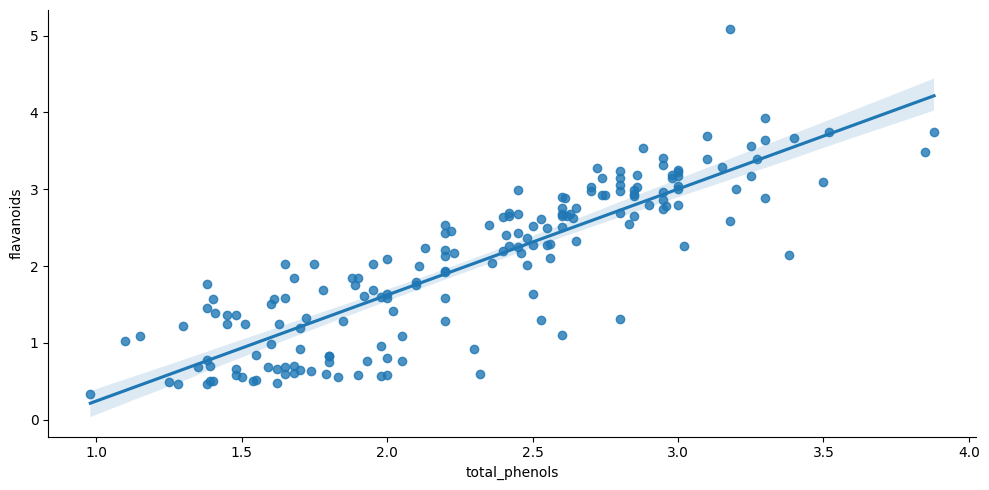

In [13]:
#sns.jointplot(data=df, x='total_phenols', y='flavanoids', kind='reg')
sns.lmplot(data=df_completo,  x='total_phenols', y='flavanoids', aspect=2)

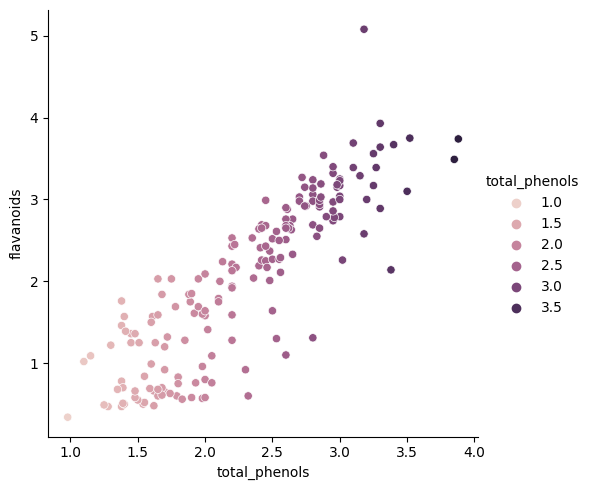

In [14]:

# Create a visualization
sns.relplot(
    data=df,
    x="total_phenols", y="flavanoids",
    hue="total_phenols"
)

In [15]:
import plotly.express as px

fig = px.scatter_3d(df, x='od280/od315_of_diluted_wines', y='flavanoids', z='total_phenols', width=1000, height=1000)
fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
fig.show()

In [16]:
# fig = px.scatter_3d(df, x='Temperatura Maxima (C)', y='Final de Semana', z='Consumo de cerveja (litros)', width=1000, height=1000)
# fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
# fig.show()

In [17]:
# fig = px.scatter_3d(df, x='Precipitacao (mm)', y='Final de Semana', z='Consumo de cerveja (litros)', width=1000, height=1000)
# fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
# fig.show()

## 🤖 3. Regressão Linear

### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
# Treinando a regressão linear e calculando como métrica do treino o MSE

# regressor = LinearRegression()

# regressor.fit(train_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']], train_data['Consumo de cerveja (litros)'])

# y_pred_train = regressor.predict(train_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']])

# mse_train = mean_squared_error(train_data['Consumo de cerveja (litros)'], y_pred_train)

# print('Erro quadrado médio - treino:', round(mse_train,3))

In [19]:
# Printando os coefientes:

# vars = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']

# for i, j in enumerate(regressor.coef_):
#     print(f'''Coeficiente da variável {vars[i]}: {round(j,5)} ''')

# print(f'''Coeficiente Linear (Bias): {round(regressor.intercept_, 5)} ''')

In [20]:
# # Fazendo predição dos valores e calculando como métrica do teste o MSE

# y_pred = regressor.predict(test_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']])

# mse_test = mean_squared_error(test_data['Consumo de cerveja (litros)'], y_pred)

# print('Erro quadrado médio - teste:', round(mse_test,3))

In [21]:
# # Plotando os dados reais versus dados preditos

# test_data['Consumo_Pred'] = y_pred

In [22]:
# sns.scatterplot(x='Consumo de cerveja (litros)', y='Consumo_Pred', data=test_data)
# plt.title('Real vs Predito')
# plt.xlabel('Valor real')
# plt.ylabel('Valor predito')